
# ETHZ: 227-0965-00L
# Micro and Nano-Tomography of Biological Tissues
# December 17th 2018

## What's Next?
### Scaling, Machine Learning and Beyond


# Who am I?


## Kevin Mader (mader@biomed.ee.ethz.ch)
 - CTO at __4Quant__ for Big Image Analytics (ETH Spin-off)
 - __Lecturer__ at ETH Zurich
 - Formerly __Postdoc__ in the X-Ray Microscopy Group at ETH Zurich (2013-2015)
 - PhD Student at Swiss Light Source at Paul Scherrer Institute (2008-2012)

- ![Kevin Mader](https://avatars0.githubusercontent.com/u/116120?s=460&v=4)

# Literature / Useful References


## General Material
- Jean Claude, Morphometry with R
 - [Online](http://link.springer.com/book/10.1007%2F978-0-387-77789-4) through ETHZ
 - [Buy it](http://www.amazon.com/Morphometrics-R-Use-Julien-Claude/dp/038777789X)
- John C. Russ, “The Image Processing Handbook”,(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN)
- J. Weickert, Visualization and Processing of Tensor Fields
 - [Online](http://books.google.ch/books?id=ScLxPORMob4C&lpg=PA220&ots=mYIeQbaVXP&dq=&pg=PA220#v=onepage&q&f=false)

## Today's Material


- Imaging
 - [ImageJ and SciJava](http://www.slideshare.net/CurtisRueden/imagej-and-the-scijava-software-stack)
- Cloud Computing
 - [The Case for Energy-Proportional Computing](http://www-inst.eecs.berkeley.edu/~cs61c/sp14/) _ Luiz André Barroso, Urs Hölzle, IEEE Computer, December 2007_
 - [Concurrency](www.gotw.ca/publications/concurrency-ddj.htm)
- Reproducibility
 - [Trouble at the lab](http://www.economist.com/news/briefing/21588057-scientists-think-science-self-correcting-alarming-degree-it-not-trouble) _Scientists like to think of science as self-correcting. To an alarming degree, it is not_
 - [Why is reproducible research important?](http://simplystatistics.org/2014/06/06/the-real-reason-reproducible-research-is-important/) _The Real Reason Reproducible Research is Important_
 - [Science Code Manifesto](http://software-carpentry.org/blog/2011/10/the-science-code-manifestos-five-cs.html)
 - [Reproducible Research Class](https://www.coursera.org/course/repdata) @ Johns Hopkins University

# Motivation: Data

- Detectors are getting bigger and faster constantly
- Todays detectors are really fast
 - 2560 x 2160 images @ 1500+ times a second = 8GB/s
- Matlab / Avizo / Python / … are saturated after 60 seconds
- A single camera
 - [More information per day than Facebook](http://news.cnet.com/8301-1023_3-57498531-93/facebook-processes-more-than-500-tb-of-data-daily/)
 - [Three times as many images per second as Instagram](http://techcrunch.com/2013/01/17/instagram-reports-90m-monthly-active-users-40m-photos-per-day-and-8500-likes-per-second/)

### X-Ray
 - SRXTM images at (>1000fps) $\rightarrow$ 8GB/s
 - cSAXS diffraction patterns $\rightarrow$ 30GB/s
 - Nanoscopium Beamline, 10-500GB file sizes, $\rightarrow$  10TB/day

### Optical
 - Light-sheet microscopy  produces images $\rightarrow$ 500MB/s
 - High-speed confocal images at (>200fps) $\rightarrow$ 78Mb/s

### Personal
 - GoPro 7 Black - 60MB/s (3840 x 2160 x 60fps) for 600CHF $\rightarrow$ 1.4 GB/s
 - [fps1000](https://www.kickstarter.com/projects/1623255426/fps1000-the-low-cost-high-frame-rate-camera) 1000 frames per second in a low cost camera 
 - 400MB/s ($640 x 480 x 840$ fps) for 400CHF


## How much is a TB, really?


If __you__ looked at one 1000 x 1000 sized image


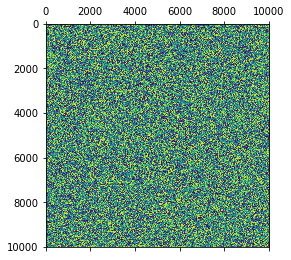

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.matshow(np.random.uniform(size = (1000, 1000)), 
           cmap = 'viridis')

every second, it would take you


In [2]:
# assuming 16 bit images and a 'metric' terabyte
time_per_tb=1e12/(1000*1000*16/8) / (60*60)
print("%04.1f hours to view a terabyte" % (time_per_tb))

138.9 hours to view a terabyte


## Motivation: Challenges
We have more complicated problems we want to solve. Count bubbles is a fine starting task, but what about real challenging problems. 
- How can we measure and quantify things we can 'see' but where we don't have a nice mathematical formula for finding it?

## [Finding diseases like tuberculosis](https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities)
- ![TB](https://i.imgur.com/cJImZIq.png)
![Sample Data](https://i.imgur.com/UIjkGY8.png)

## [Detecting regions of pneumonia](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge)
- ![Pneu](https://i.imgur.com/naQ3JtQ.png) 

![Opacities](https://i.imgur.com/m9fypeh.png)

# [Finding Breast Cancer](https://www.kaggle.com/kmader/mias-mammography)
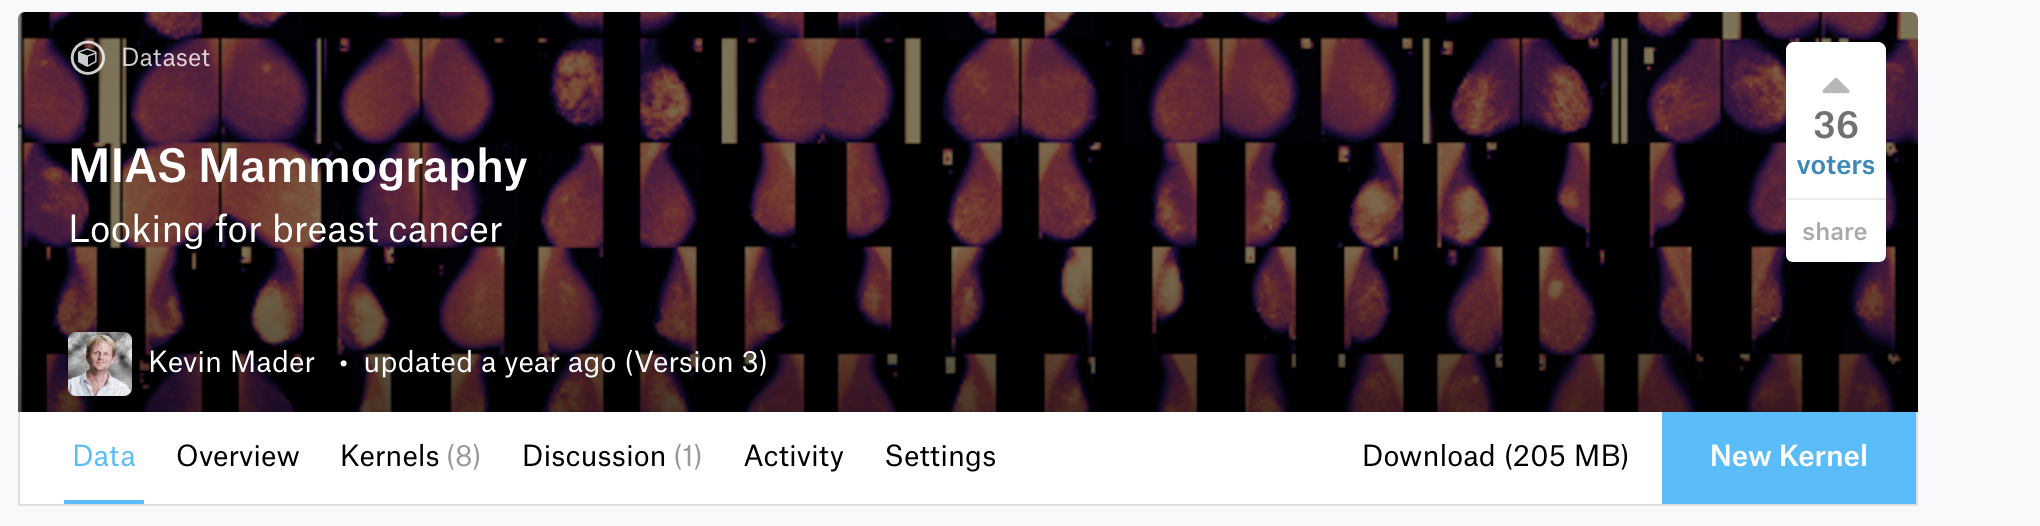
![Breast cancer](https://i.imgur.com/IJrO6I2.png)

# [Detecting Early Signs of Skin Cancer](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/kernels)
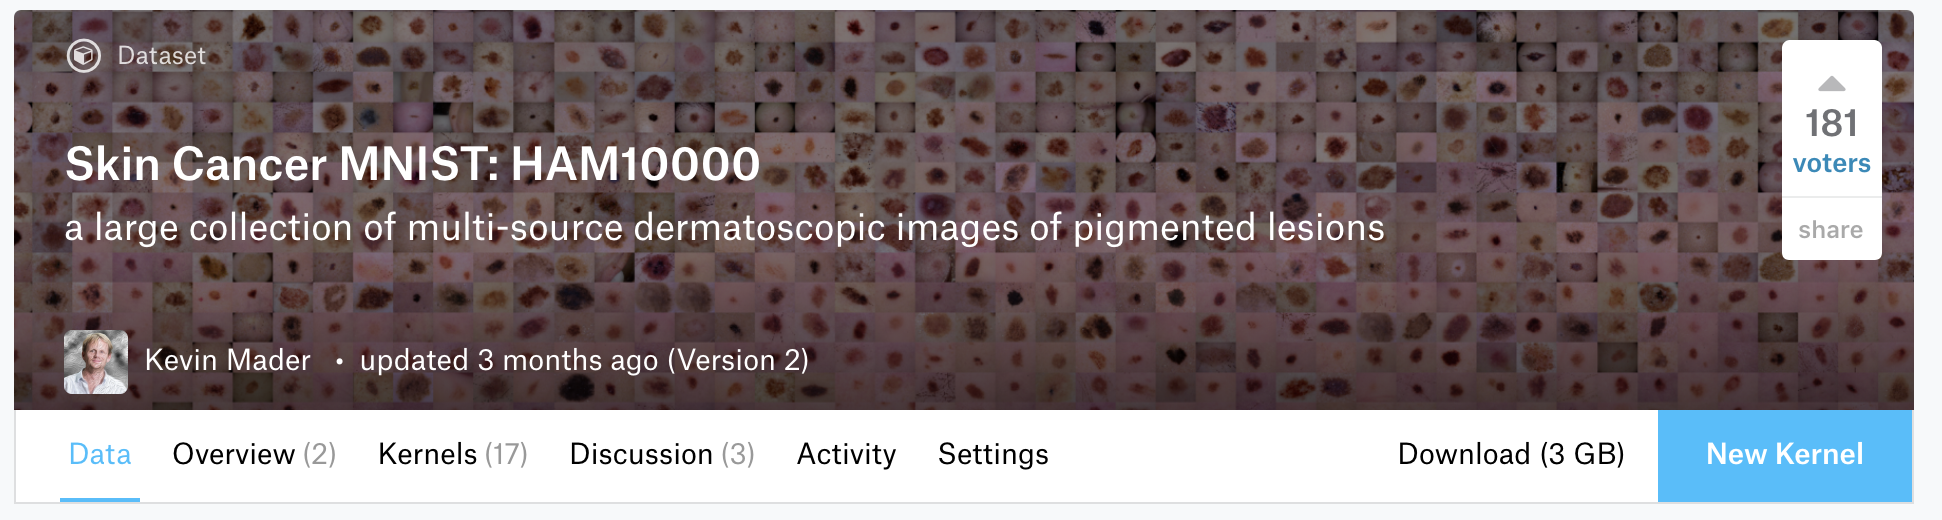

![Imgur](https://i.imgur.com/hlNs3fs.jpg)


## Image Analysis

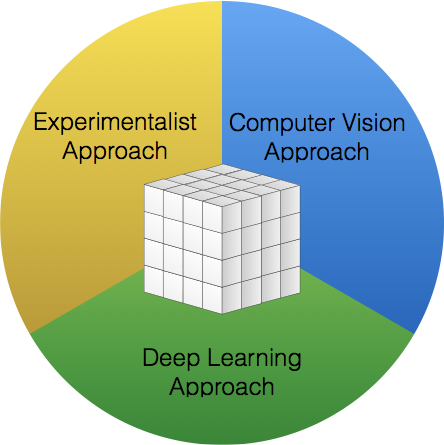

- An image is a bucket of pixels.
- How you choose to turn it into useful information is strongly dependent on your background

## Image Analysis: Experimentalist

### Problem-driven
### Top-down
### _Reality_ Model-based

### Examples

- cell counting
- porosity

## Image Analysis: Computer Vision Approaches


- Method-driven
 - Feature-based
 - _Image_ Model-based
- Engineer features for solving problems

### Examples

- edge detection
- face detection

## Experimentalist + Computer Vision
These approaches make up the techniques you have covered up until this point.
- Filtering
- Morphology
- Threshold / Segmentation
- Component Labeling
- Measurements

## Image Analysis: Deep Learning Approach


- Results-driven
- Biology ‘inspired’
- Build both image processing and analysis from scratch

### Examples

- Captioning images
- Identifying unusual events


# Data: Scaling


## Moores Law
$$ \textrm{Transistors} \propto 2^{T/(\textrm{18 months})} $$

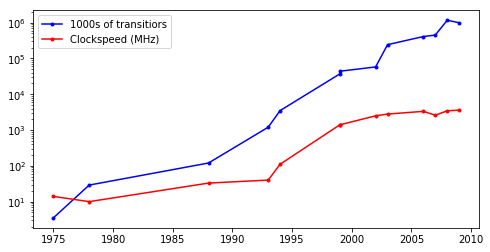

In [3]:
%matplotlib inline
# stolen from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
moores_txt=["Id Name  Year  Count(1000s)  Clock(MHz)\n",
        "0            MOS65XX  1975           3.51           14\n",
        "1          Intel8086  1978          29.00           10\n",
        "2          MIPSR3000  1988         120.00           33\n",
        "3           AMDAm486  1993        1200.00           40\n",
        "4        NexGenNx586  1994        3500.00          111\n",
        "5          AMDAthlon  1999       37000.00         1400\n",
        "6   IntelPentiumIII  1999       44000.00         1400\n",
        "7         PowerPC970  2002       58000.00         2500\n",
        "8       AMDAthlon64  2003      243000.00         2800\n",
        "9    IntelCore2Duo  2006      410000.00         3330\n",
        "10         AMDPhenom  2007      450000.00         2600\n",
        "11      IntelCorei7  2008     1170000.00         3460\n",
        "12      IntelCorei5  2009      995000.00         3600"]

sio_table = StringIO(''.join(moores_txt))
moore_df = pd.read_table(sio_table, sep = '\s+', index_col = 0)
fig, ax1 = plt.subplots(1,1, figsize = (8, 4))
ax1.semilogy(moore_df['Year'], moore_df['Count(1000s)'], 'b.-', label = '1000s of transitiors')
ax1.semilogy(moore_df['Year'], moore_df['Clock(MHz)'], 'r.-', label = 'Clockspeed (MHz)')
ax1.legend(loc = 2)

<small>_Based on data from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d_</small>

----

There are now many more transistors inside a single computer but the processing speed hasn't increased. How can this be?

- Multiple Core
 - Many machines have multiple cores for each processor which can perform tasks independently
- Multiple CPUs
 - More than one chip is commonly present
- New modalities
  - GPUs provide many cores which operate at slow speed

### New approaches are important!

## Science and Imaging

### Images are great for qualitative analyses since our brains can quickly interpret them without large _programming_ investements.
### Proper processing and quantitative analysis is however much more difficult with images.
 - If you measure a temperature, quantitative analysis is easy, $50K$.
 - If you measure an image it is much more difficult and much more prone to mistakes, subtle setup variations, and confusing analyses


### Furthermore in image processing there is a plethora of tools available

- Thousands of algorithms available
- Thousands of tools
- Many images require multi-step processing
- Experimenting is time-consuming

## Reproducibility

Science demands __repeatability__! and really wants __reproducability__
- Experimental conditions can change rapidly and are difficult to make consistent
- Animal and human studies are prohibitively time consuming and expensive to reproduce
- Terabyte datasets cannot be easily passed around many different groups
- Privacy concerns can also limit sharing and access to data

----

- _Science_ is already difficult enough
- Image processing makes it even more complicated
- Many image processing tasks are multistep, have many parameters, use a variety of tools, and consume a very long time

### How can we keep track of everything for ourselves and others?
- We can make the data analysis easy to repeat by an independent 3rd party

# Soup/Recipe Example

## Simple Soup
Easy to follow the list, anyone with the right steps can execute and repeat (if not reproduce) the soup


1. Buy {carrots, peas, tomatoes} at market
1. _then_ Buy meat at butcher
1. _then_ Chop carrots into pieces
1. _then_ Chop potatos into pieces
1. _then_ Heat water
1. _then_ Wait until boiling then add chopped vegetables
1. _then_ Wait 5 minutes and add meat



## More complicated soup
Here it is harder to follow and you need to carefully keep track of what is being performed

### Steps 1-4
4. _then_ Mix carrots with potatos $\rightarrow  mix_1$
4. _then_ add egg to $mix_1$ and fry for 20 minutes
4. _then_ Tenderize meat for 20 minutes
4. _then_ add tomatoes to meat and cook for 10 minutes $\rightarrow mix_2$
5. _then_ Wait until boiling then add $mix_1$
6. _then_ Wait 5 minutes and add $mix_2$

# Using flow charts / workflows

## Simple Soup

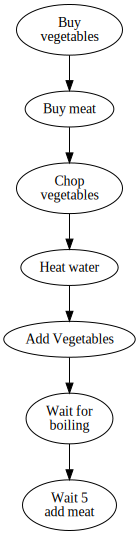

In [1]:
from IPython.display import SVG
import pydot
graph = pydot.Dot(graph_type='digraph')
node_names = ["Buy\nvegetables","Buy meat","Chop\nvegetables","Heat water", "Add Vegetables",
              "Wait for\nboiling","Wait 5\nadd meat"]
nodes = [pydot.Node(name = '%04d' % i, label = c_n) 
         for i, c_n in enumerate(node_names)]
for c_n in nodes:
    graph.add_node(c_n)
    
for (c_n, d_n) in zip(nodes, nodes[1:]):
    graph.add_edge(pydot.Edge(c_n, d_n))

SVG(graph.create_svg())


## Workflows

Clearly a linear set of instructions is ill-suited for even a fairly easy soup, it is then even more difficult when there are dozens of steps and different pathsways


----

Furthermore a clean workflow allows you to better parallelize the task since it is clear which tasks can be performed independently



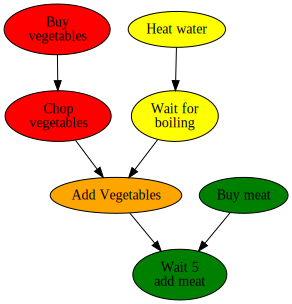

In [2]:
from IPython.display import SVG
import pydot
graph = pydot.Dot(graph_type='digraph')
node_names = ["Buy\nvegetables","Buy meat","Chop\nvegetables","Heat water", "Add Vegetables",
              "Wait for\nboiling","Wait 5\nadd meat"]
nodes = [pydot.Node(name = '%04d' % i, label = c_n, style = 'filled') 
         for i, c_n in enumerate(node_names)]
for c_n in nodes:
    graph.add_node(c_n)
    
def e(i,j, col = None):
    if col is not None:
        for c in [i,j]:
            if nodes[c].get_fillcolor() is None: 
                nodes[c].set_fillcolor(col)
    graph.add_edge(pydot.Edge(nodes[i], nodes[j]))

e(0, 2, 'red')
e(2, 4)
e(3, -2, 'yellow')
e(-2, 4, 'orange')
e(4, -1)
e(1, -1, 'green')


SVG(graph.create_svg())


# Directed Acyclical Graphs (DAG)
We can represent almost any computation without loops as DAG. What this allows us to do is now break down a computation into pieces which can be carried out independently. There are a number of tools which let us handle this issue.

- PyData Dask - https://dask.pydata.org/en/latest/
- Apache Spark - https://spark.apache.org/
- Spotify Luigi - https://github.com/spotify/luigi
- Airflow - https://airflow.apache.org/
- KNIME - https://www.knime.com/
- Google Tensorflow - https://www.tensorflow.org/
- Pytorch / Torch - http://pytorch.org/

# Concrete example
What is a DAG good for?

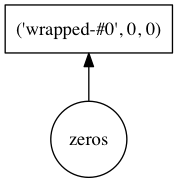

In [32]:
import dask.array as da
from dask.dot import dot_graph
image_1 = da.zeros((5,5), chunks = (5,5))
image_2 = da.ones((5,5), chunks = (5,5))
dot_graph(image_1.dask)

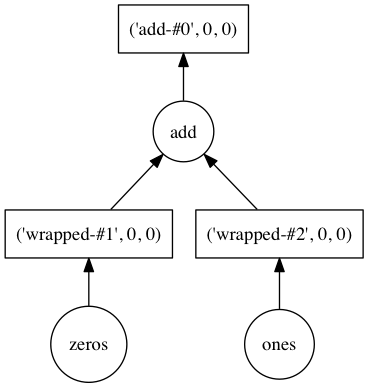

In [33]:
image_3 = image_1 + image_2
dot_graph(image_3.dask)

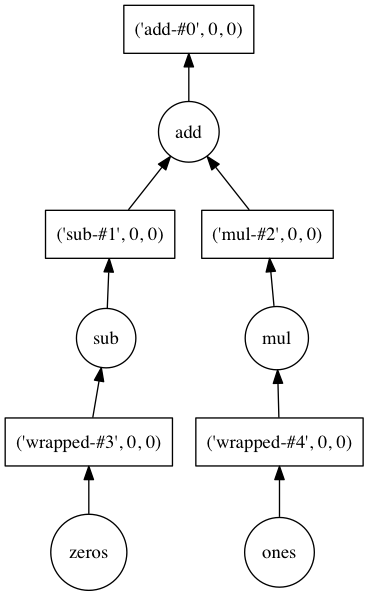

In [34]:
image_4 = (image_1-10) + (image_2*50)
dot_graph(image_4.dask)

# Let's go big
Now let's see where this can be really useful

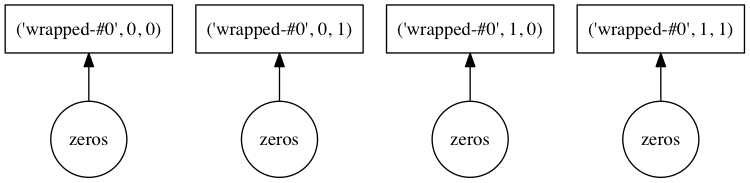

In [35]:
import dask.array as da
from dask.dot import dot_graph
image_1 = da.zeros((1024, 1024), chunks = (512, 512))
image_2 = da.ones((1024 ,1024), chunks = (512, 512))
dot_graph(image_1.dask)

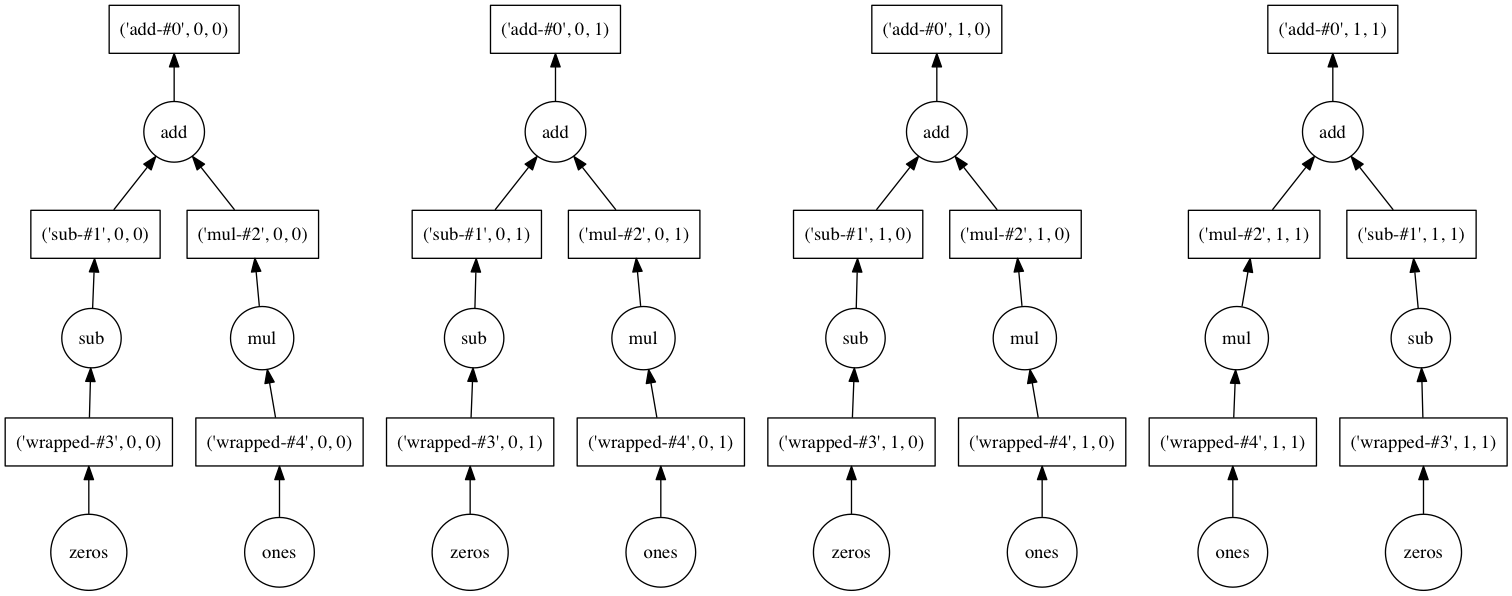

In [36]:
image_4 = (image_1-10) + (image_2*50)
dot_graph(image_4.dask)

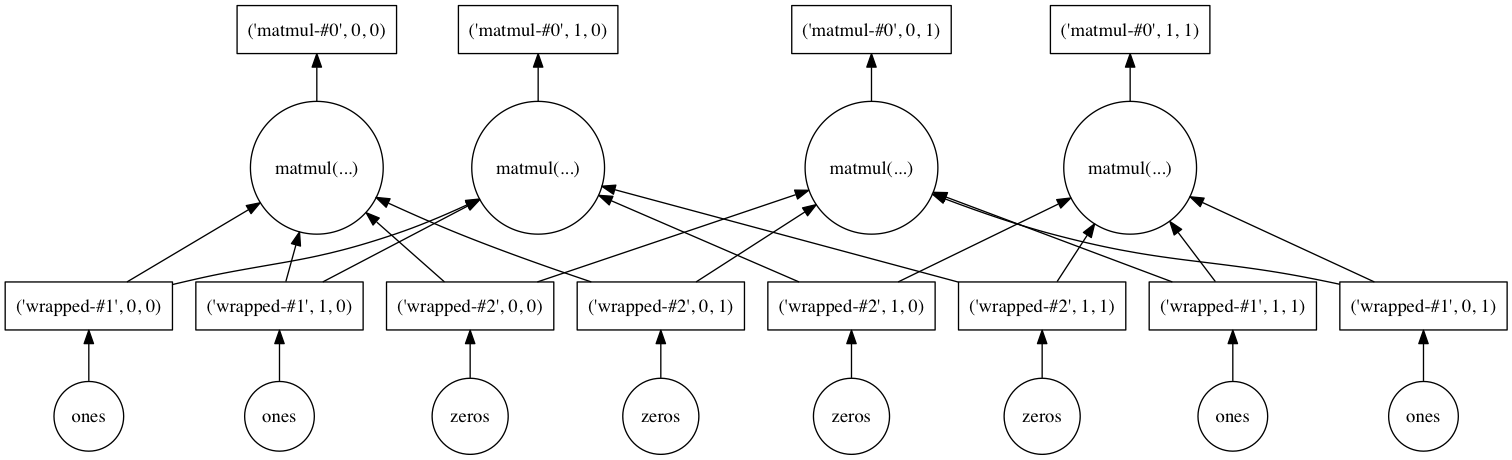

In [37]:
image_5 = da.matmul(image_1, image_2)
dot_graph(image_5.dask)

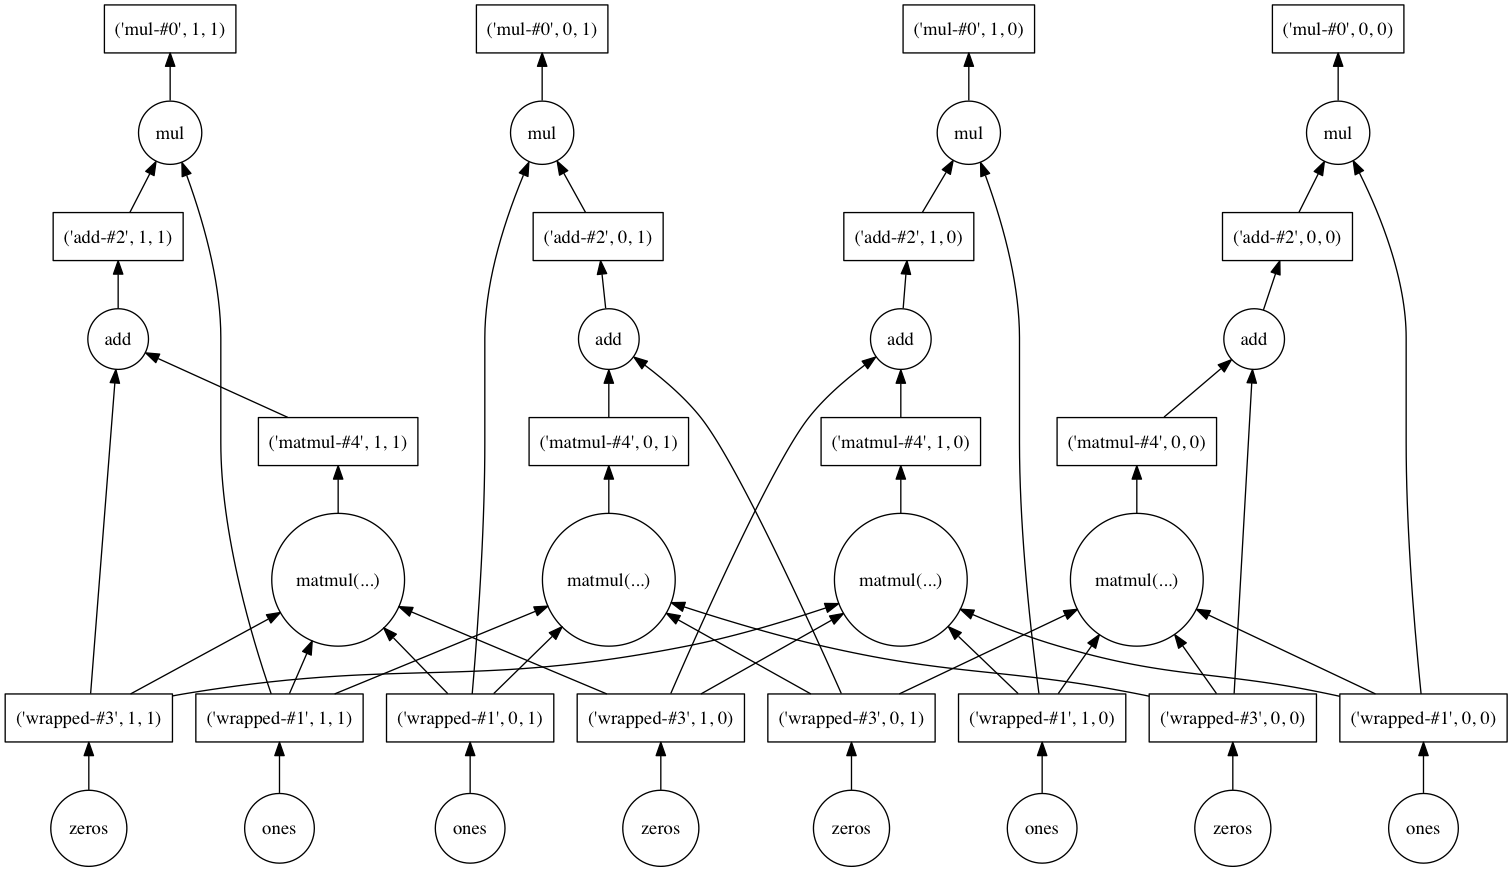

In [38]:
image_6 = (da.matmul(image_1, image_2)+image_1)*image_2
dot_graph(image_6.dask)

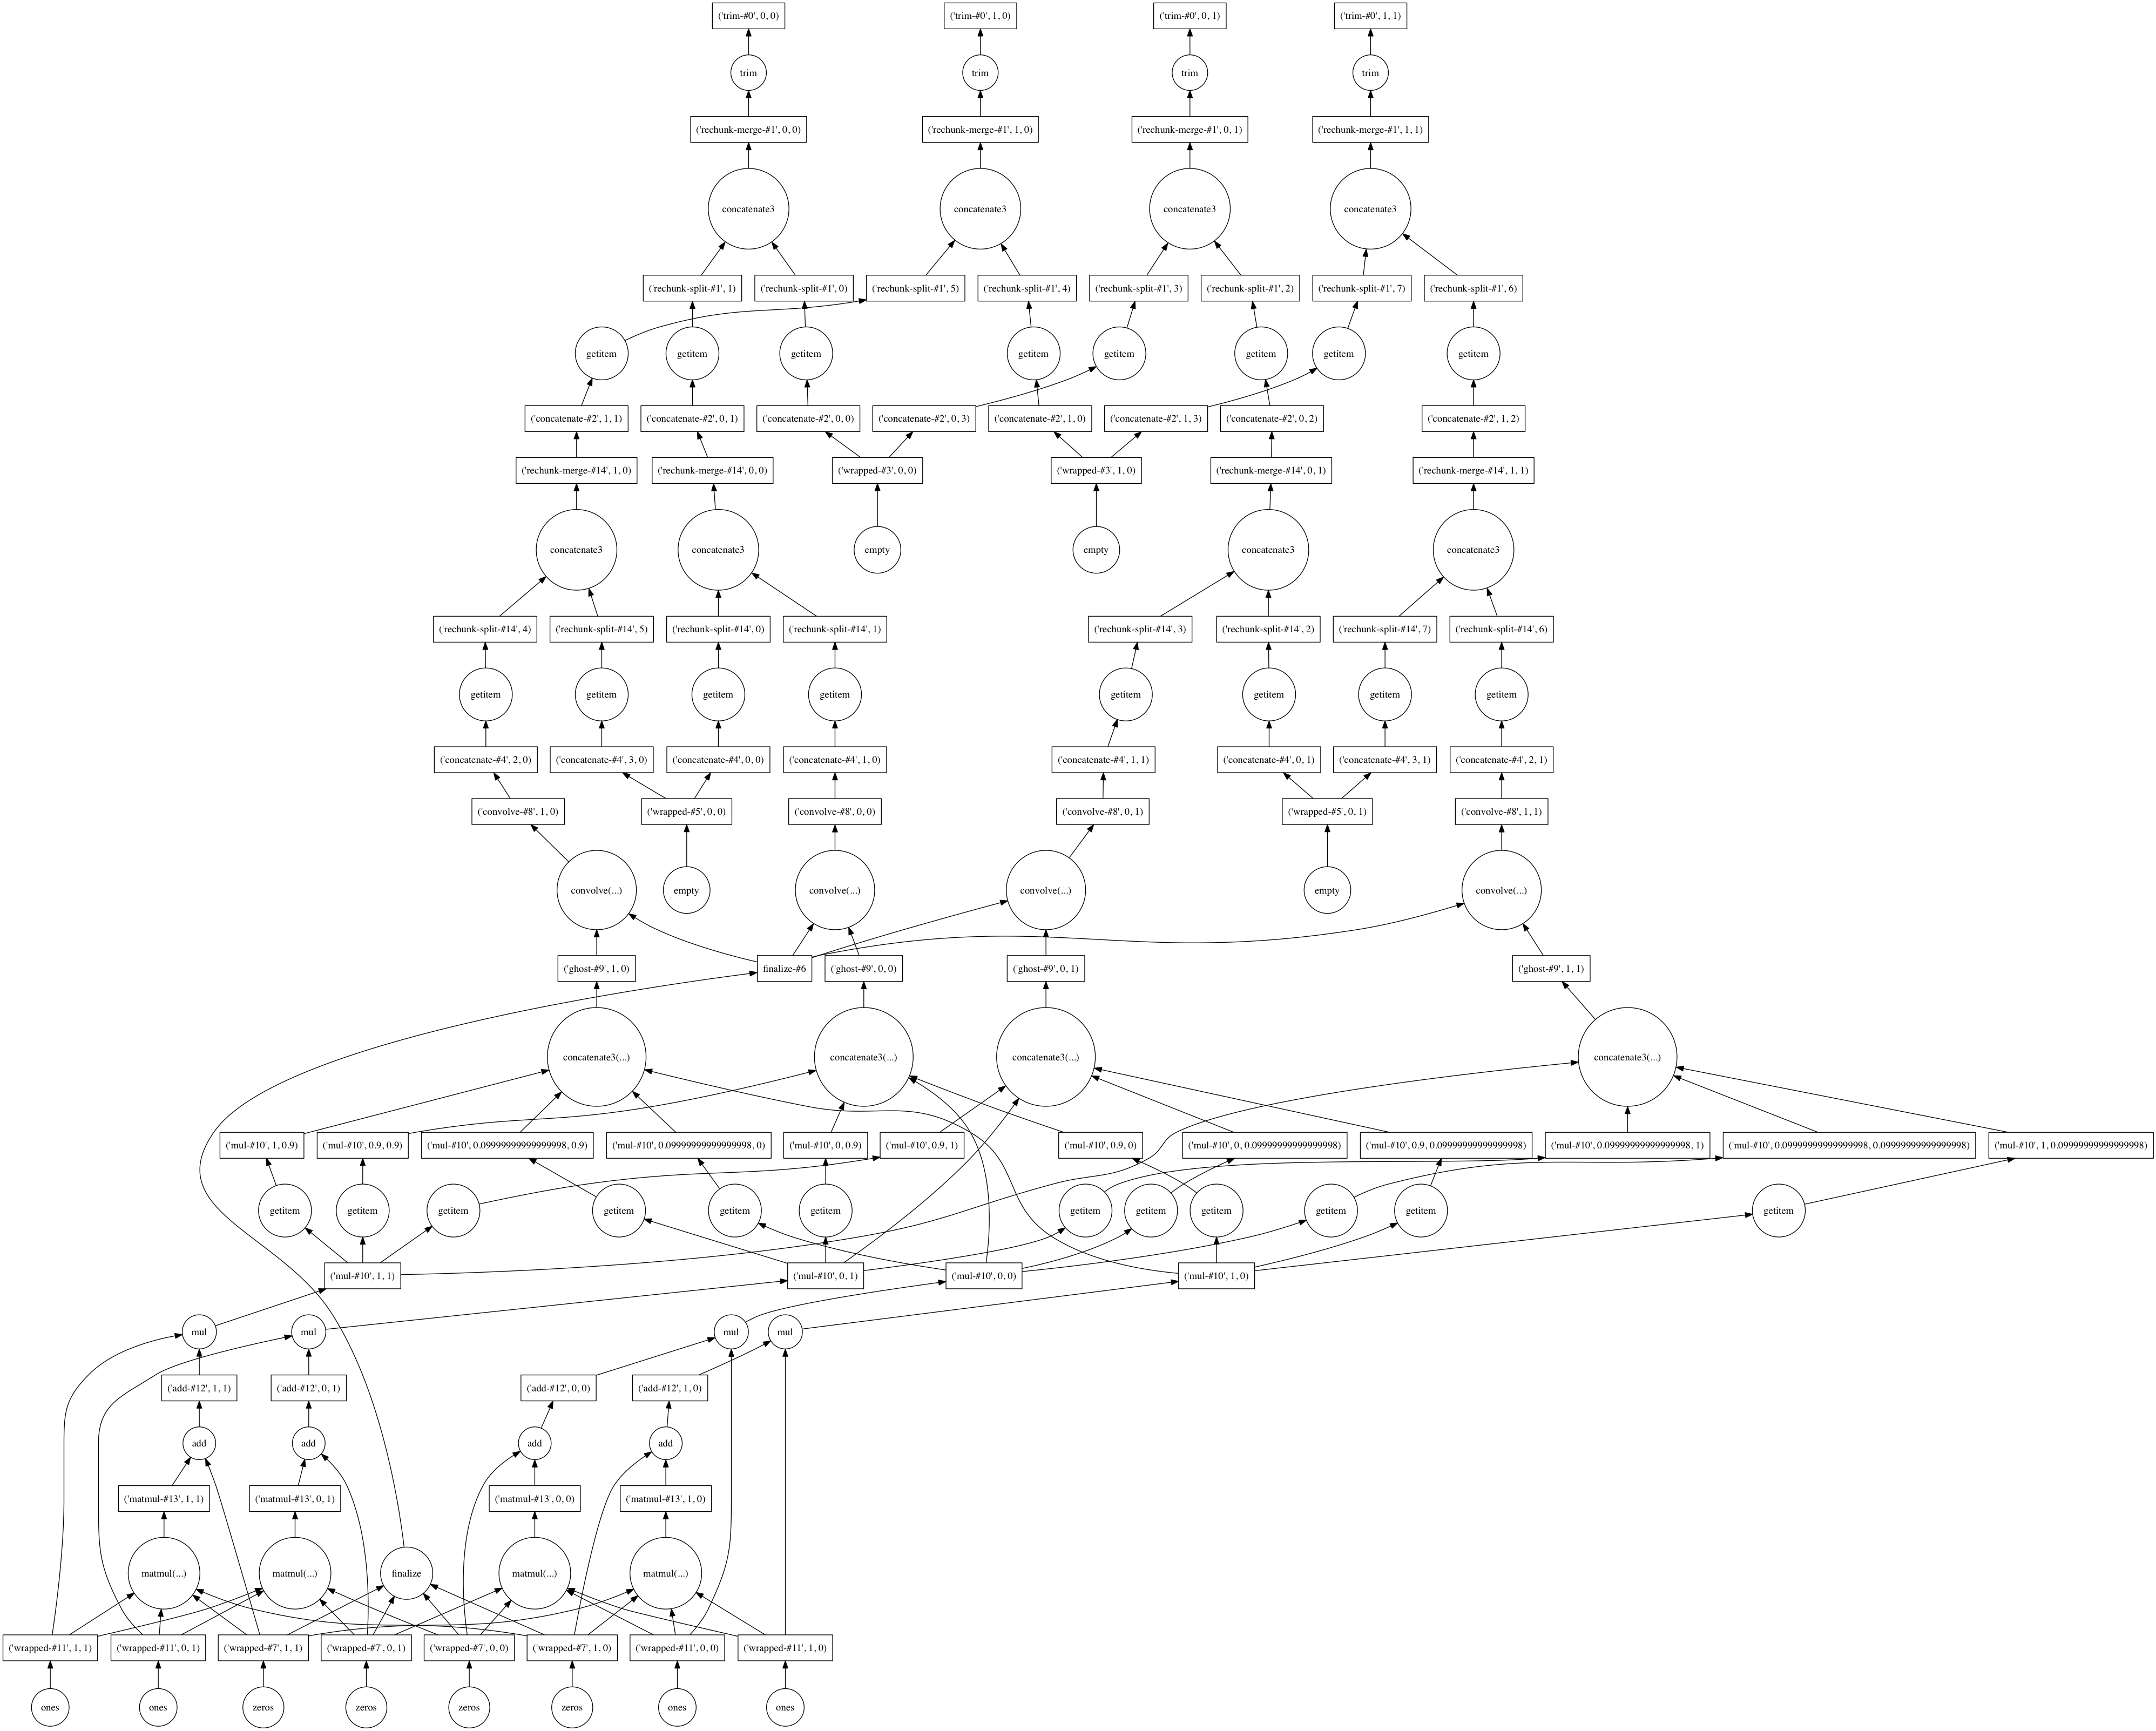

In [39]:
import dask_ndfilters as da_ndfilt
image_7 = da_ndfilt.convolve(image_6, image_1)
dot_graph(image_7.dask)

# Deep Learning
We won't talk too much about deep learning now, but it certainly shows why DAGs are so important. The steps above are simple toys compared to what tools are already in use for machine learning

/Users/kevinmader/miniconda3/envs/qbi2018/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


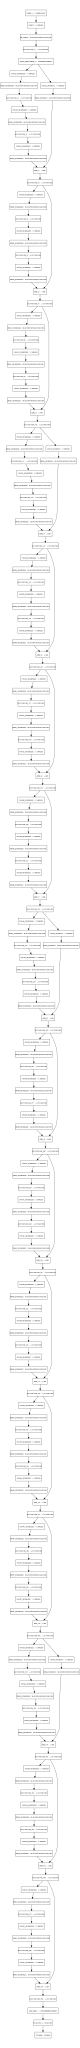

In [3]:
from IPython.display import SVG
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import model_to_dot 
resnet = ResNet50(weights = None)
SVG(model_to_dot(resnet).create_svg())

In [41]:
from IPython.display import clear_output, Image, display, HTML
import keras.backend as K
import tensorflow as tf
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = ("<stripped %d bytes>"%size).encode('ascii')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
sess = K.get_session()
show_graph(sess.graph)

# Image Analysis: Deep Learning Approach


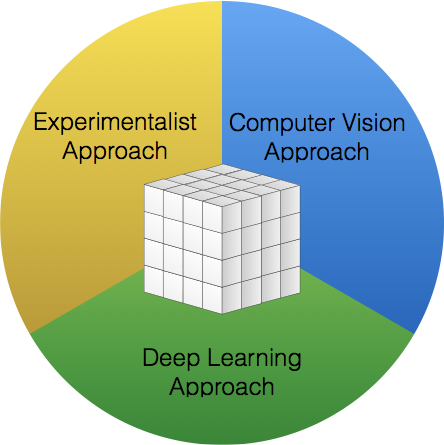

- Results-driven
- Biology ‘inspired’
- Build both image processing and analysis from scratch

### Examples

- Captioning images
- Identifying unusual events
